In [1]:
import pandas as pd
from sodapy import Socrata


client = Socrata("data.cdc.gov",None)
results = client.get("r8kw-7aab",limit=2000)
results_df = pd.DataFrame.from_records(results)
results_df.head()

,data_as_of,start_week,end_week,group,state,indicator,covid_deaths,total_deaths,percent_of_expected_deaths,pneumonia_deaths,pneumonia_and_covid_deaths,influenza_deaths,pneumonia_influenza_or_covid,footnote
0,2020-05-18T00:00:00.000,2020-02-01T00:00:00.000,2020-02-01T00:00:00.000,By week,United States,Week-ending,0,57551,0.97,3707,0,473,4180,NaN
1,2020-05-18T00:00:00.000,2020-02-08T00:00:00.000,2020-02-08T00:00:00.000,By week,United States,Week-ending,1,58151,0.97,3706,0,507,4214,NaN
2,2020-05-18T00:00:00.000,2020-02-15T00:00:00.000,2020-02-15T00:00:00.000,By week,United States,Week-ending,0,57490,0.98,3734,0,537,4271,NaN
3,2020-05-18T00:00:00.000,2020-02-22T00:00:00.000,2020-02-22T00:00:00.000,By week,United States,Week-ending,2,57527,0.99,3603,0,553,4158,NaN
4,2020-05-18T00:00:00.000,2020-02-29T00:00:00.000,2020-02-29T00:00:00.000,By week,United States,Week-ending,7,57816,1,3714,5,626,4342,NaN


In [2]:
float_cols=['total_deaths', 'percent_of_expected_deaths', 'pneumonia_deaths','pneumonia_and_covid_deaths', 'influenza_deaths', 'pneumonia_influenza_or_covid']
date_cols=['data_as_of','start_week','end_week']
def transform_df(df,date_cols,float_cols):
    for col in date_cols:
        df[col] = pd.to_datetime(df[col])
    for col in float_cols:
        df[col] = df[col].astype(float)
    return df.drop_duplicates(subset=['start_week','state','indicator'],keep='last').reset_index(drop=True)

results_df = pd.DataFrame.from_records(results).pipe(transform_df,date_cols,float_cols)

results_df.head()

,data_as_of,start_week,end_week,group,state,indicator,covid_deaths,total_deaths,percent_of_expected_deaths,pneumonia_deaths,pneumonia_and_covid_deaths,influenza_deaths,pneumonia_influenza_or_covid,footnote
0,2020-05-18,2020-02-01,2020-02-01,By week,United States,Week-ending,0,57551.0,0.97,3707.0,0.0,473.0,4180.0,NaN
1,2020-05-18,2020-02-08,2020-02-08,By week,United States,Week-ending,1,58151.0,0.97,3706.0,0.0,507.0,4214.0,NaN
2,2020-05-18,2020-02-15,2020-02-15,By week,United States,Week-ending,0,57490.0,0.98,3734.0,0.0,537.0,4271.0,NaN
3,2020-05-18,2020-02-22,2020-02-22,By week,United States,Week-ending,2,57527.0,0.99,3603.0,0.0,553.0,4158.0,NaN
4,2020-05-18,2020-02-29,2020-02-29,By week,United States,Week-ending,7,57816.0,1.00,3714.0,5.0,626.0,4342.0,NaN


In [3]:
results_df.start_week.unique()

array(['2020-02-01T00:00:00.000000000', '2020-02-08T00:00:00.000000000',
       '2020-02-15T00:00:00.000000000', '2020-02-22T00:00:00.000000000',
       '2020-02-29T00:00:00.000000000', '2020-03-07T00:00:00.000000000',
       '2020-03-14T00:00:00.000000000', '2020-03-21T00:00:00.000000000',
       '2020-03-28T00:00:00.000000000', '2020-04-04T00:00:00.000000000',
       '2020-04-11T00:00:00.000000000', '2020-04-18T00:00:00.000000000',
       '2020-04-25T00:00:00.000000000', '2020-05-02T00:00:00.000000000',
       '2020-05-09T00:00:00.000000000', '2020-05-16T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [4]:
results_df['state'].unique()

array(['United States', 'Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'New York City', 'North Carolina', 'North Dakota', 'Ohio',
       'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin',
       'Wyoming', 'Puerto Rico'], dtype=object)

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f882b6ad2d0>)

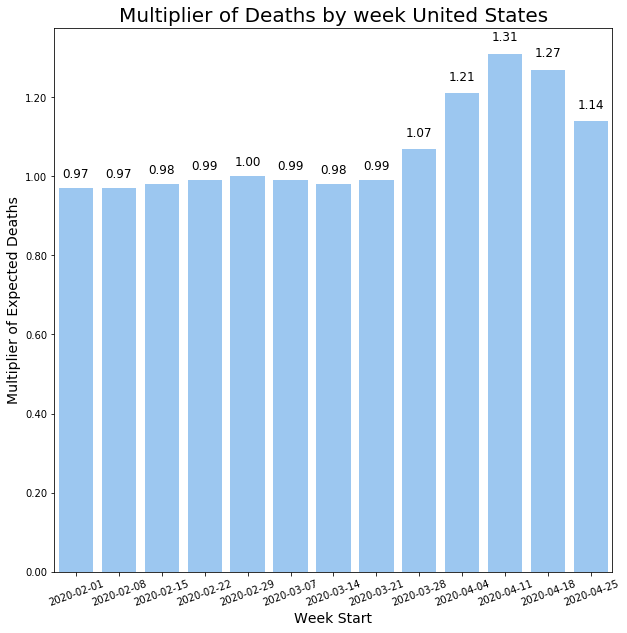

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from matplotlib.dates import DateFormatter
%matplotlib inline

def autolabel(rects, ax, loc = 1.02, perc = True, ha = 'center'):
    # attach some text labels

    for rect in rects:
        height = rect.get_height()
        if perc:
            bar_label = '%1.1f' % float(height*100) + "%"
        else:
            bar_label = '%1.2f' % float(height)
        ax.text(rect.get_x() + rect.get_width()/2., loc*height,
                bar_label,
                ha=ha, va='bottom', fontsize = 12)

def plot_death_bar(df,state='United States',with_multiplier='percent'):
    data = df[df['state']==state]
    fig,ax = plt.subplots(figsize=(10,10))
    if with_multiplier=='percent':
        formatter = FuncFormatter(lambda y, pos:"%d%%" % (y*100))
    else:
        formatter = FuncFormatter(lambda y, pos:"%.2f" % (y))
#     data['percent_of_expected_deaths']-=1
    sns.barplot(x='start_week',y='percent_of_expected_deaths',data=data,color='dodgerblue',alpha=.5)
#     ax.set_xticks(data['start_week'])
    percent = (with_multiplier=='percent')
    autolabel(ax.patches,ax,perc=percent)
    ax.xaxis.set_tick_params(rotation=20)
    ax.yaxis.set_major_formatter(formatter)
    ax.set_xticklabels(data['start_week'].dt.strftime('%Y-%m-%d'))
    if with_multiplier=='percent':
        ax.set_title('Percent of Deaths by week {}'.format(state),fontsize=20)
        ax.set_ylabel('Percent of Expected Deaths',fontsize=14)
    else:
        ax.set_title('Multiplier of Deaths by week {}'.format(state),fontsize=20)
        ax.set_ylabel('Multiplier of Expected Deaths',fontsize=14)
    ax.set_xlabel("Week Start",fontsize=14)
    return fig,ax

def plot_death_line(df,state_list=[]):
    state_list = ['United States']+state_list
    data = df[df['state'].isin(state_list)]
    fig,ax = plt.subplots(figsize=(10,10))
    formatter = FuncFormatter(lambda y, pos:"%d%%" % (y*100))
    sns.lineplot(x='start_week',y='percent_of_expected_deaths',data=data,hue='state')
#     ax.set_xticks(data['start_week'])
#     autolabel(ax.patches,ax)
    ax.xaxis.set_tick_params(rotation=20)
    ax.yaxis.set_major_formatter(formatter)
    ax.set_xticks(data['start_week'].drop_duplicates())
#     ax.set_xticklabels(data['start_week'].drop_duplicates().dt.strftime('%Y-%m-%d').iloc[::2])
#     ax.set_xticklabels(data['start_week'].dt.strftime('%Y-%m-%d'))
    ax.set_title('Percent of Deaths by week US',fontsize=20)
    ax.set_ylabel('Percent of Expected Deaths',fontsize=14)
    ax.set_xlabel("Week Start",fontsize=14)
    return fig,ax

plot_death_bar(results_df[results_df['start_week']<'2020-05-01'],with_multiplier='blue')

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f882b6a18d0>)

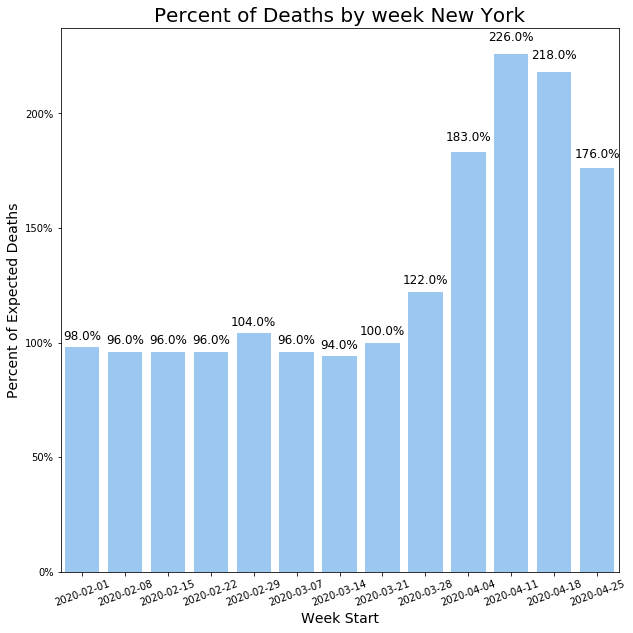

In [6]:
plot_death_bar(results_df[results_df['start_week']<'2020-05-01'],'New York')

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f882b09b8d0>)

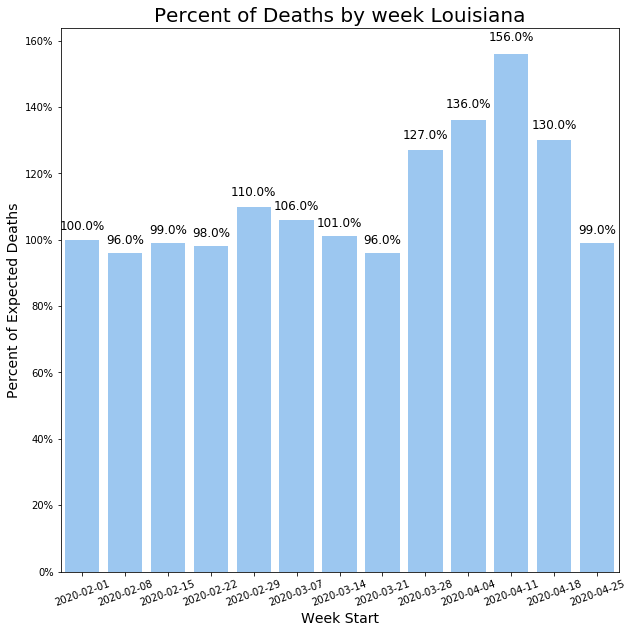

In [7]:
plot_death_bar(results_df[results_df['start_week']<'2020-05-01'],'Louisiana')

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f882af6a990>)

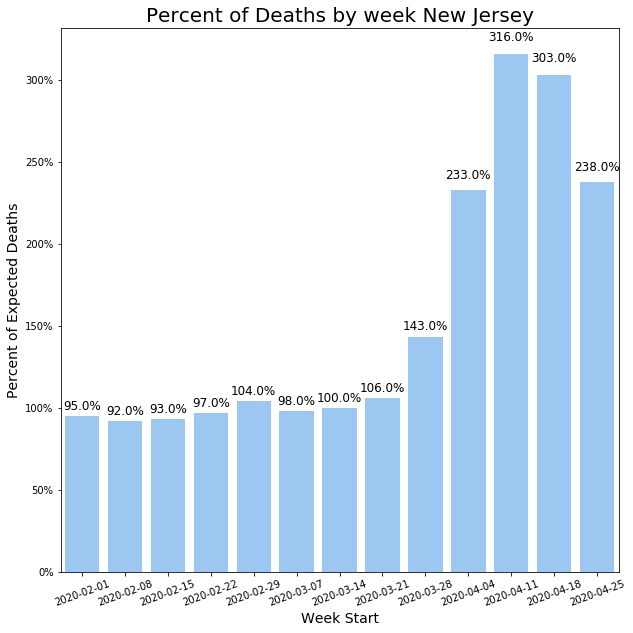

In [8]:
plot_death_bar(results_df[results_df['start_week']<'2020-05-01'],'New Jersey')

/home/jaalhashash/miniconda/envs/jawsem_env/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f882ac6ba10>)

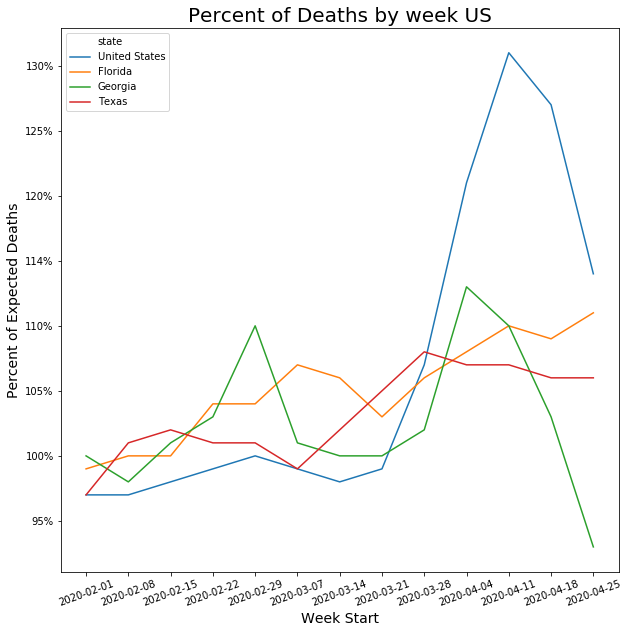

In [9]:
plot_death_line(results_df[results_df['start_week']<'2020-05-01'],['Florida','Georgia','Texas'])

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f882abd9b10>)

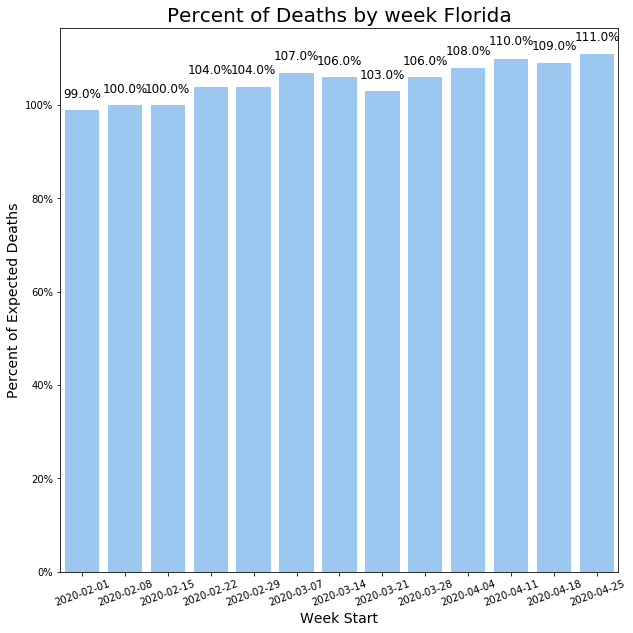

In [10]:
plot_death_bar(results_df[results_df['start_week']<'2020-05-01'],'Florida')

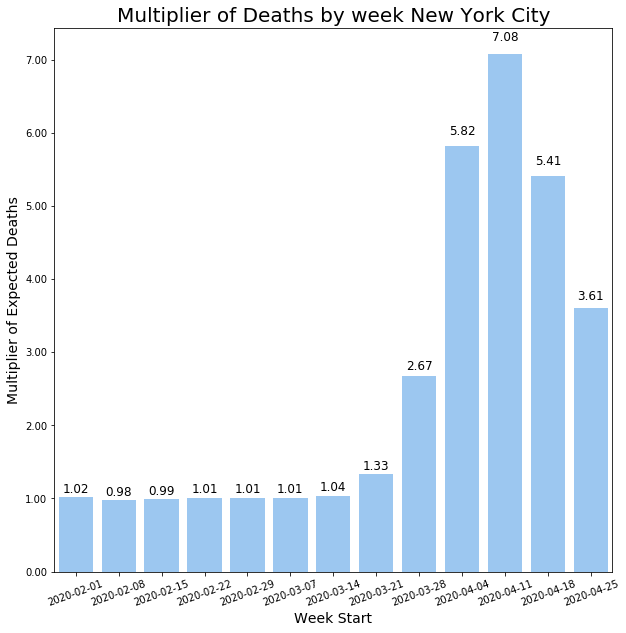

In [11]:
fig,ax = plot_death_bar(results_df[results_df['start_week']<'2020-05-01'],'New York City',with_multiplier='yes')
fig.savefig("weekly_deaths_nyc_multiplier.png")

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f88292469d0>)

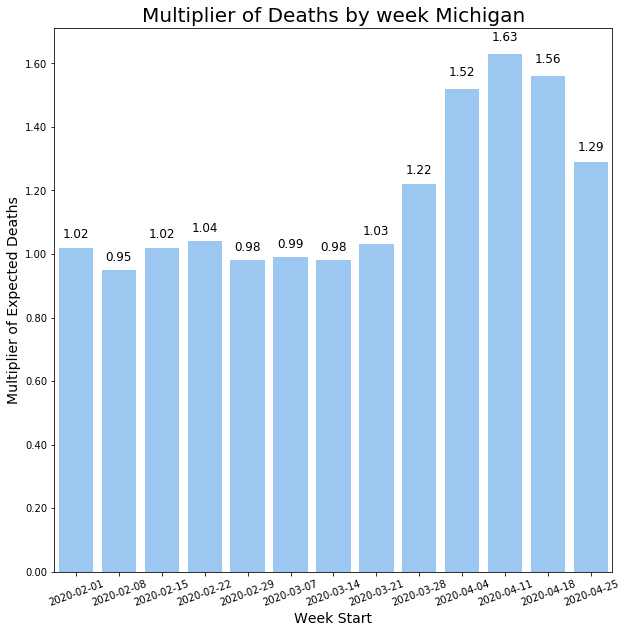

In [12]:
plot_death_bar(results_df[results_df['start_week']<'2020-05-01'],'Michigan',with_multiplier='yes')

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f882913dc90>)

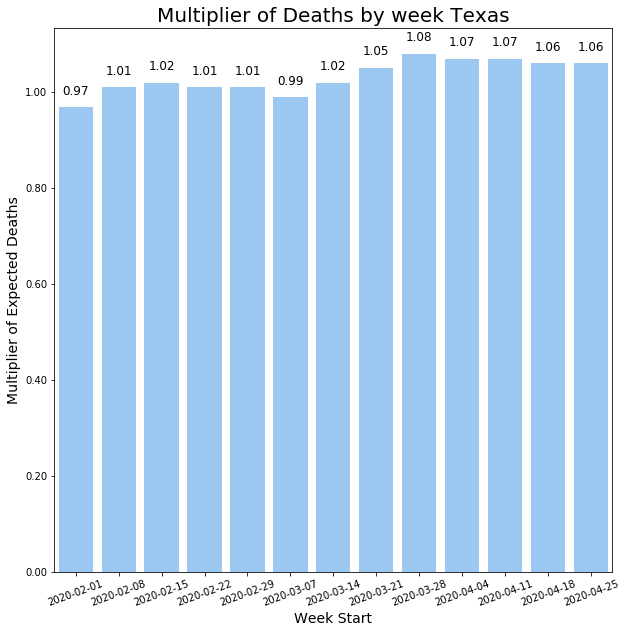

In [13]:
plot_death_bar(results_df[results_df['start_week']<'2020-05-01'],'Texas',with_multiplier='yes')

In [14]:
results_df.sort_values(by='percent_of_expected_deaths',ascending=False).head(20)

,data_as_of,start_week,end_week,group,state,indicator,covid_deaths,total_deaths,percent_of_expected_deaths,pneumonia_deaths,pneumonia_and_covid_deaths,influenza_deaths,pneumonia_influenza_or_covid,footnote
554,2020-05-18,2020-04-11,2020-04-11,By week,New York City,Week-ending,4424,7549.0,7.08,2028.0,1655.0,322.0,4808.0,NaN
553,2020-05-18,2020-04-04,2020-04-04,By week,New York City,Week-ending,2948,5999.0,5.82,1696.0,1240.0,209.0,3413.0,NaN
555,2020-05-18,2020-04-18,2020-04-18,By week,New York City,Week-ending,3488,5495.0,5.41,1395.0,1232.0,171.0,3654.0,NaN
556,2020-05-18,2020-04-25,2020-04-25,By week,New York City,Week-ending,2150,3566.0,3.61,951.0,836.0,76.0,2270.0,NaN
506,2020-05-18,2020-04-11,2020-04-11,By week,New Jersey,Week-ending,2045,4492.0,3.16,1322.0,1031.0,NaN,2339.0,One or more data cells have counts between 1–9...
507,2020-05-18,2020-04-18,2020-04-18,By week,New Jersey,Week-ending,2061,4295.0,3.03,1197.0,961.0,NaN,2299.0,One or more data cells have counts between 1–9...
552,2020-05-18,2020-03-28,2020-03-28,By week,New York City,Week-ending,911,2746.0,2.67,589.0,344.0,46.0,1164.0,NaN
508,2020-05-18,2020-04-25,2020-04-25,By week,New Jersey,Week-ending,1435,3248.0,2.38,906.0,719.0,NaN,1624.0,One or more data cells have counts between 1–9...
505,2020-05-18,2020-04-04,2020-04-04,By week,New Jersey,Week-ending,1115,3414.0,2.33,860.0,577.0,10.0,1406.0,NaN
538,2020-05-18,2020-04-11,2020-04-11,By week,New York,Week-ending,1826,4445.0,2.26,1259.0,957.0,11.0,2135.0,NaN


In [15]:
(results_df['start_week']<'2020-05-01').sum()

702

In [16]:
results_df[results_df['state'].isin(['United States'])]

,data_as_of,start_week,end_week,group,state,indicator,covid_deaths,total_deaths,percent_of_expected_deaths,pneumonia_deaths,pneumonia_and_covid_deaths,influenza_deaths,pneumonia_influenza_or_covid,footnote
0,2020-05-18,2020-02-01,2020-02-01,By week,United States,Week-ending,0,57551.0,0.97,3707.0,0.0,473.0,4180.0,NaN
1,2020-05-18,2020-02-08,2020-02-08,By week,United States,Week-ending,1,58151.0,0.97,3706.0,0.0,507.0,4214.0,NaN
2,2020-05-18,2020-02-15,2020-02-15,By week,United States,Week-ending,0,57490.0,0.98,3734.0,0.0,537.0,4271.0,NaN
3,2020-05-18,2020-02-22,2020-02-22,By week,United States,Week-ending,2,57527.0,0.99,3603.0,0.0,553.0,4158.0,NaN
4,2020-05-18,2020-02-29,2020-02-29,By week,United States,Week-ending,7,57816.0,1.00,3714.0,5.0,626.0,4342.0,NaN
5,2020-05-18,2020-03-07,2020-03-07,By week,United States,Week-ending,32,57408.0,0.99,3799.0,16.0,608.0,4422.0,NaN
6,2020-05-18,2020-03-14,2020-03-14,By week,United States,Week-ending,51,55993.0,0.98,3793.0,26.0,598.0,4415.0,NaN
7,2020-05-18,2020-03-21,2020-03-21,By week,United States,Week-ending,517,56213.0,0.99,4309.0,237.0,521.0,5104.0,NaN
8,2020-05-18,2020-03-28,2020-03-28,By week,United States,Week-ending,2900,59586.0,1.07,5846.0,1312.0,422.0,7807.0,NaN
9,2020-05-18,2020-04-04,2020-04-04,By week,United States,Week-ending,8921,67586.0,1.21,9270.0,4278.0,445.0,14138.0,NaN


In [17]:
results_df['data_as_of'].value_counts()

2020-05-18    864
Name: data_as_of, dtype: int64

In [18]:
NY = results_df[results_df['state']=='New York City'].reset_index(drop=True)
NY['start_week'].dt.strftime('%Y-%m-%d')

0     2020-02-01
1     2020-02-08
2     2020-02-15
3     2020-02-22
4     2020-02-29
5     2020-03-07
6     2020-03-14
7     2020-03-21
8     2020-03-28
9     2020-04-04
10    2020-04-11
11    2020-04-18
12    2020-04-25
13    2020-05-02
14    2020-05-09
15    2020-05-16
Name: start_week, dtype: object

/home/jaalhashash/miniconda/envs/jawsem_env/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(left, right)


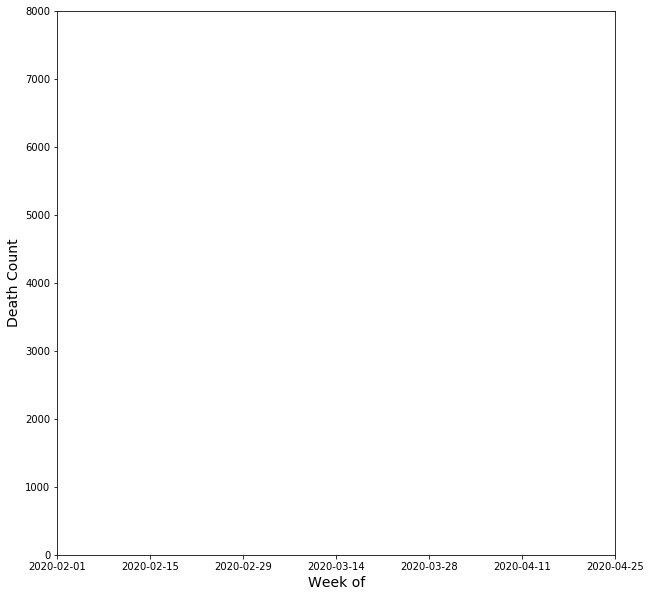

In [19]:
from celluloid import Camera
from IPython.display import HTML

fig,ax = plt.subplots(figsize=(10,10))
camera = Camera(fig)
for i in range(NY.shape[0]-3):
    NY.iloc[0:i+1]['total_deaths'].plot(ax=ax,color='dodgerblue')
    ax.set_xticklabels(NY['start_week'].dt.strftime('%Y-%m-%d').iloc[::2])
    ax.text(0.5,1.05,'Death Count in NYC: Week of {}: {:.0f}'.format(NY['start_week'].dt.strftime('%Y-%m-%d').iloc[i],NY['total_deaths'].iloc[i]),fontsize=20,horizontalalignment='center',transform = ax.transAxes)
    ax.set_ylabel('Death Count',fontsize=14)
    ax.set_xlabel("Week of",fontsize=14)
    ax.set_ylim(0,8000)
    ax.text(1,-.1,'Data Source: https://data.cdc.gov/NCHS/Provisional-COVID-19-Death-Counts-by-Week-Ending-D/r8kw-7aab',fontsize=10,horizontalalignment='right',fontstyle='italic', bbox=dict(facecolor='dodgerblue',alpha=0.5),transform = ax.transAxes)
    camera.snap()
    
animation = camera.animate(interval=1000)
animation.save('weekly_deaths_nyc.mp4')



In [20]:
import os
import subprocess


# subprocess.call('ffmpeg -i weekly_deaths_nyc.mp4 weekly_deaths_nyc.gif',cwd = os.getcwd(),shell=True)
out = subprocess.Popen(['ffmpeg','-y','-i','weekly_deaths_nyc.mp4','weekly_deaths_nyc.gif'],stdout=subprocess.PIPE, stderr=subprocess.STDOUT)
stdout, stderr = out.communicate()
# os.system('ls')
# subprocess.call('echo "I like poratoes"',shell=True)
stdout

b"ffmpeg version 4.2 Copyright (c) 2000-2019 the FFmpeg developers\n  built with gcc 7.3.0 (crosstool-NG 1.23.0.449-a04d0)\n  configuration: --prefix=/home/jaalhashash/miniconda/envs/jawsem_env --cc=/home/conda/feedstock_root/build_artifacts/ffmpeg_1566210161358/_build_env/bin/x86_64-conda_cos6-linux-gnu-cc --disable-doc --disable-openssl --enable-avresample --enable-gnutls --enable-gpl --enable-hardcoded-tables --enable-libfreetype --enable-libopenh264 --enable-libx264 --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame\n  libavutil      56. 31.100 / 56. 31.100\n  libavcodec     58. 54.100 / 58. 54.100\n  libavformat    58. 29.100 / 58. 29.100\n  libavdevice    58.  8.100 / 58.  8.100\n  libavfilter     7. 57.100 /  7. 57.100\n  libavresample   4.  0.  0 /  4.  0.  0\n  libswscale      5.  5.100 /  5.  5.100\n  libswresample   3.  5.100 /  3.  5.100\n  libpostproc    55.  5.100 / 55.  5.100\nInput #0, mov,mp4,m4a,3gp,3g2,m

<img src="weekly_deaths_nyc.gif" width="600">

/home/jaalhashash/miniconda/envs/jawsem_env/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(left, right)


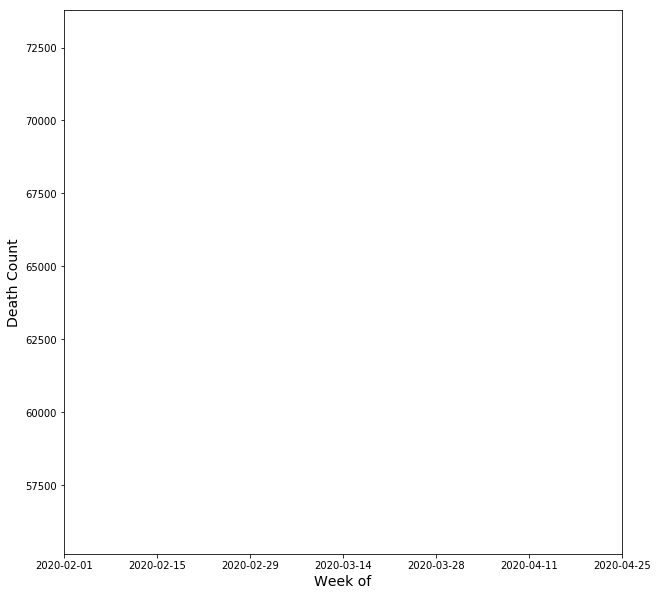

In [21]:
def make_death_gif(results_df,state,max_date='2020-05-01'):
    plot_data = results_df[results_df['state']==state].reset_index(drop=True)
    plot_data['start_week'].dt.strftime('%Y-%m-%d')
    plot_data = plot_data[plot_data['start_week']<max_date].reset_index(drop=True)
    fig,ax = plt.subplots(figsize=(10,10))
    camera = Camera(fig)
    for i in range(plot_data.shape[0]):
        plot_data.iloc[0:i+1]['total_deaths'].plot(ax=ax,color='dodgerblue')
        ax.set_xticklabels(plot_data['start_week'].dt.strftime('%Y-%m-%d').iloc[::2])
        ax.text(0.5,1.05,'Death Count in {}: Week of {}: {:.0f}'.format(state,plot_data['start_week'].dt.strftime('%Y-%m-%d').iloc[i],plot_data['total_deaths'].iloc[i]),fontsize=20,horizontalalignment='center',transform = ax.transAxes)
        ax.set_ylabel('Death Count',fontsize=14)
        ax.set_xlabel("Week of",fontsize=14)
#         ax.set_ylim(0,8000)
        ax.text(1,-.1,'Data Source: https://data.cdc.gov/NCHS/Provisional-COVID-19-Death-Counts-by-Week-Ending-D/r8kw-7aab',fontsize=10,horizontalalignment='right',fontstyle='italic', bbox=dict(facecolor='dodgerblue',alpha=0.5),transform = ax.transAxes)
        camera.snap()

    animation = camera.animate(interval=1000)
    return animation

def make_gif(animation,save_name,debug=False):
    animation.save('test.mp4')
    out = subprocess.Popen(['ffmpeg','-y','-i','test.mp4',save_name],stdout=subprocess.PIPE, stderr=subprocess.STDOUT)
    stdout, stderr = out.communicate()
    del_out = subprocess.Popen(['rm','test.mp4'],stdout=subprocess.PIPE, stderr=subprocess.STDOUT)
    stdout2, stderr2 = del_out.communicate()
    if debug:
        print("Output of Gif Creation:\n {}\n {}".format(stdout,stderr))
        print("Output of mp4 deletion:\n {}\n {}".format(stdout2,stderr2))
    
ani = make_death_gif(results_df,'United States')
make_gif(ani,'weekly_deaths_us.gif',debug=False)

<img src="weekly_deaths_us.gif" width="600">

In [22]:
county_data = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv')

In [23]:
county_data.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [24]:
import geopandas as gpd

geo_df = gpd.read_file('./shape_files/cb_2018_us_county_500k.shp')

In [25]:
geo_df['fips'] = geo_df['GEOID'].astype(float)

In [26]:
final_geo_df = county_data.merge(geo_df,how='left',on='fips')

In [27]:
final_geo_df.head()

,date,county,state,fips,cases,deaths,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,2020-01-21,Snohomish,Washington,53061.0,1,0,53,061,01529222,0500000US53061,53061,Snohomish,06,5.404059e+09,2.829123e+08,"MULTIPOLYGON (((-122.33164 48.02056, -122.3283..."
1,2020-01-22,Snohomish,Washington,53061.0,1,0,53,061,01529222,0500000US53061,53061,Snohomish,06,5.404059e+09,2.829123e+08,"MULTIPOLYGON (((-122.33164 48.02056, -122.3283..."
2,2020-01-23,Snohomish,Washington,53061.0,1,0,53,061,01529222,0500000US53061,53061,Snohomish,06,5.404059e+09,2.829123e+08,"MULTIPOLYGON (((-122.33164 48.02056, -122.3283..."
3,2020-01-24,Cook,Illinois,17031.0,1,0,17,031,01784766,0500000US17031,17031,Cook,06,2.447371e+09,1.786313e+09,"POLYGON ((-88.26364 42.06687, -88.25835 42.066..."
4,2020-01-24,Snohomish,Washington,53061.0,1,0,53,061,01529222,0500000US53061,53061,Snohomish,06,5.404059e+09,2.829123e+08,"MULTIPOLYGON (((-122.33164 48.02056, -122.3283..."


In [28]:
final_geo_df = final_geo_df[~final_geo_df['state'].isin(['Hawaii','Alaska','Puerto Rico'])].reset_index(drop=True)

In [29]:
day_list = final_geo_df['date'].unique().tolist()[11:]


In [30]:
import mapclassify
import numpy as np

scheme = mapclassify.NaturalBreaks(final_geo_df['cases'],k=5)


In [31]:
final_geo_df.dropna(inplace=True)


In [32]:
import geoplot
import geoplot.crs as gcrs
from celluloid import Camera
from IPython.display import HTML
# contiguous_usa = gpd.read_file(geoplot.datasets.get_path('contiguous_usa'))
# ax3 = geoplot.webmap(contiguous_usa,projection=gcrs.WebMercator(),figsize=(15,10))
# fig3 = ax3.get_figure()
# camera = Camera(fig3)
# for day in day_list[::5]:
#     print(day)
#     geoplot.webmap(contiguous_usa,projection=gcrs.WebMercator(),ax=ax3)

#     test_geo = gpd.GeoDataFrame(final_geo_df[final_geo_df['date']==day])
#     geoplot.choropleth(
#     test_geo, hue='cases', 
#     cmap='Reds', ax = ax3, edgecolor=None,scheme = scheme,legend=True, legend_kwargs={'bbox_to_anchor':(.9,.2)}
#  )
#     ax3.text(0.5,1,'Total Covid Cases by Country: {}'.format(day),fontsize=20,horizontalalignment='center',transform = ax3.transAxes)
# #     ax3.axis('off')
    
#     camera.snap()
# animation = camera.animate(interval=500)
# HTML(animation.to_html5_video())


In [33]:
# NY = results_df[results_df['state']=='New York City'].reset_index(drop=True)
# NY.head()

In [34]:
# NY['start_week'].dt.strftime('%Y-%m-%d')

In [35]:
# fig,ax = plt.subplots(figsize=(10,10))
# camera = Camera(fig)
# for i in range(NY.shape[0]):
#     NY.iloc[0:i+1]['total_deaths'].plot(ax=ax,color='dodgerblue')
#     ax.set_xticklabels(NY['start_week'].dt.strftime('%Y-%m-%d').iloc[::2])
#     ax.text(0.5,1.05,'Death Count in NYC: Week of {}: {:.0f}'.format(NY['start_week'].dt.strftime('%Y-%m-%d').iloc[i],NY['total_deaths'].iloc[i]),fontsize=20,horizontalalignment='center',transform = ax.transAxes)
#     ax.set_ylabel('Death Count',fontsize=14)
#     ax.set_xlabel("Week of",fontsize=14)
#     ax.text(1,-.1,'Data Source: https://data.cdc.gov/NCHS/Provisional-COVID-19-Death-Counts-by-Week-Ending-D/r8kw-7aab',fontsize=10,horizontalalignment='right',fontstyle='italic', bbox=dict(facecolor='dodgerblue',alpha=0.5),transform = ax.transAxes)
#     camera.snap()
    
# animation = camera.animate(interval=500)
# animation.save('weekly_deaths_nyc.mp4')

# HTML(animation.to_html5_video())
